# COLD GASS CO Luminosity Plot

The total CO luminosity $L'_{CO}$ of each galaxy can be calculated as follows:

$L'_{CO}=3.25 \times 10^{7} S_{CO,cor} \nu_{obs}^{-2} D_{L}^{2} (1+z)^{-3}$

Where $S_{CO,cor}$ is the integrated line flux Jykm/s, $\nu_{obs}$ is the observed frequency of the CO(1-0) line ($\approx 111~GHz$), $z$ is the redshift and $D_{L}$ is the luminosity distance in units of Mpc.

The luminosity distance can be calclated using the comoving distance.

$D_{L}=(1+z)D_{m}$

If $\Omega_{k}=0$ then $D_{m}=D_{c}=D_{H}\int_{0}^{z} \frac{dz'}{E(z')}$

Where $D_{c}=\frac{c}{H_{0}}$ 

And $E(z)=\sqrt{\Omega_{m}(1+z)^{3}+\Omega_{k}(1+z)^{2}+\Omega_{\Lambda}}$

From the Planck 2015 results we have $\Omega_{m}=0.31$, $\Omega_{\Lambda}=0.69$ and $\Omega_{k}=0$. So this leads to the final expression for the luminosity distance.

$D_{L}=\frac{c}{H_{0}}\int_{0}^{z}\frac{dz'}{\sqrt{\Omega_{m}(1+z)^{3}+\Omega_{\Lambda}}}$

## The Code

import the dependecies

In [1]:
import numpy as np
import atpy
import math
from scipy import integrate
import matplotlib.pyplot as plt
import asciidata

Function to calculate the luminosity distance.

In [2]:
def lumdistance(z):
    omega_m = 0.31                          # from Planck
    omega_l = 0.69                          # from Planck
    c = 3*math.pow(10,5)                    # in km/s
    Ho = 70                                 # in km/(s Mpc)
    f = lambda x : (((omega_m*((1+z)**3))+omega_l)**-0.5)
    integral = integrate.quad(f, 0.0, z)    # numerically integrate to calculate luminosity distance
    Dm = (c/Ho)*integral[0]
    Dl = (1+z)*Dm                           # calculate luminosity distance
    DH = (c*z)/Ho                           # calculate distance from Hubble law for comparison
    return Dl, DH

Function to calculate the Luminosity using the first equation and using the factor of 6.0 if the low mass galaxies are used.

In [3]:
def lCalc(SCO, z, correction):
    lums = []
    for i in range(0,len(SCO)):                              # for each galaxy in the dataset
        if correction == True:
            SCO_cor = SCO[i]*6.0                      # find the integrated CO flux
        else:
            SCO_cor = SCO[i]
        C = 3.25*math.pow(10,7)                 # numerical const from eqn 4 paper 1
        freq = 111                              # observing frequency
        Dl, DH = lumdistance(z[i])           # luminosity distance
        SDSS_z = math.pow((1+z[i]),-3)       # redshift component
        L_CO = C*SCO_cor*((Dl*Dl)/(freq*freq))*SDSS_z   # calculate CO luminosity
        lums.append(L_CO)
    return lums

Function to remove non-detections from the sample

In [4]:
def NonDetect(data, flag):
    datanew = []
    for i in range (0,len(data)):
        if flag[i] == 1:
            datanew.append(data[i])
    return datanew

Function to sort the luminosity into number bins in logspace.

In [5]:
def sortIntoBins(l):
    low = min(l)
    high = max(l)     # min max in logspace
    bins = np.linspace(low, high,num=15) # log-spaced bins
    N = []
    xbins = []
    for i in range (1,len(bins)):
        inbin = [x for x in l if x > bins[i-1] and x < bins[i]]
        n = len(inbin)
        N.append(n)
        N.append(n)
        xbins.append(bins[i-1])
        xbins.append(bins[i])
    return np.log10(N), xbins

Read data and sort into the bins

In [6]:
highM = atpy.Table('COLDGASS_DR3.fits')         # read web data from table
lowM = asciidata.open('COLDGASS_LOW_29Sep15.ascii')

SCOH, zH = [], []
for rows in highM:                              # for each galaxy in the dataset
    SCOH.append(rows[15])                      # find the integrated CO flux
    zH.append(rows[4])
SCOL, zL, flagL = list(lowM[11]), list(lowM[3]), list(lowM[15])
lumsnew = list(lowM[12])
lumsnew = NonDetect(lumsnew, flagL)
SCOL, zL = NonDetect(SCOL, flagL), NonDetect(zL, flagL)
L = lCalc([0.49],[0.01711],True)
B = lCalc([SCOL[0]],[zL[0]],True)

lumsH = lCalc(SCOH,zH,False)
lumsL = lCalc(SCOL,zL,True)

lumsL = [i for i in lumsL if i > 0.0]         # remove 0 detected CO flux galaxies
lumsH = [i for i in lumsH if i > 0.0]         # remove 0 detected CO flux galaxies
lumsL, lumsH = np.log10(lumsL), np.log10(lumsH)
combined = np.append(lumsL, lumsH)

NL, midL = sortIntoBins(lumsL)
NH, midH = sortIntoBins(lumsH)
NC, midC = sortIntoBins(combined)
NR, midR = sortIntoBins(lumsnew)

Auto-detected table type: fits


/usr/local/lib/python2.7/dist-packages/ipykernel/__main__.py:14: RuntimeWarning: divide by zero encountered in log10


Plot the data using matplotlib.

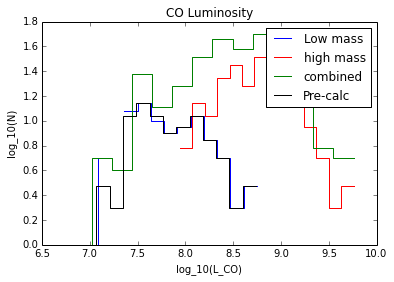

In [7]:
%matplotlib inline
plt.plot(midL,NL,'b-', label = 'Low mass')
plt.plot(midH,NH,'r-', label = 'high mass')
plt.plot(midC,NC,'g-', label = 'combined')
plt.plot(midR,NR,'k-', label = 'Pre-calc')
plt.xlabel('log_10(L_CO)')
plt.ylabel('log_10(N)')
plt.title('CO Luminosity')
plt.legend()
plt.savefig('lum.png')
plt.show()

## MHI

## MH2

## Correct Our Sample by weighting ratio vs SDSS

## Units of gas mass -> Proper Units and Schecter Function Fit

## OMEGA H2 (integrate under mass function curve)